<a href="https://colab.research.google.com/github/aqil0300/projects/blob/main/Credit_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Credit Score Classification Dataset.csv')
df

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000.0,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000.0,Master's Degree,Married,2,Owned,High
2,35,Female,75000.0,Doctorate,Married,1,Owned,High
3,40,Male,125000.0,High School Diploma,Single,0,Owned,High
4,45,Female,100000.0,Bachelor's Degree,Married,3,Owned,High
...,...,...,...,...,...,...,...,...
159,29,Female,27500.0,High School Diploma,Single,0,Rented,Low
160,34,Male,47500.0,Associate's Degree,Single,0,Rented,Average
161,39,Female,62500.0,Bachelor's Degree,Married,2,Owned,High
162,44,Male,87500.0,Master's Degree,Single,0,Owned,High


In [ ]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000.0,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000.0,Master's Degree,Married,2,Owned,High
2,35,Female,75000.0,Doctorate,Married,1,Owned,High
3,40,Male,125000.0,High School Diploma,Single,0,Owned,High
4,45,Female,100000.0,Bachelor's Degree,Married,3,Owned,High


In [ ]:
df.tail()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
159,29,Female,27500.0,High School Diploma,Single,0,Rented,Low
160,34,Male,47500.0,Associate's Degree,Single,0,Rented,Average
161,39,Female,62500.0,Bachelor's Degree,Married,2,Owned,High
162,44,Male,87500.0,Master's Degree,Single,0,Owned,High
163,49,Female,77500.0,Doctorate,Married,1,Owned,High


In [ ]:
df.shape

(164, 8)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,164.0,37.975610,8.477289,25.0,30.75,37.0,45.0,53.0
Income,155.0,83951.612903,32187.194669,25000.0,58750.00,82500.0,105000.0,162500.0
Number of Children,164.0,0.652439,0.883346,0.0,0.00,0.0,1.0,3.0


In [ ]:
df.dtypes

Age                     int64
Gender                 object
Income                float64
Education              object
Marital Status         object
Number of Children      int64
Home Ownership         object
Credit Score           object
dtype: object

In [ ]:
df = df.drop(['Gender'],axis=1)

In [ ]:
df.isna().sum()

Age                   0
Income                9
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

In [ ]:
df['Income']=df['Income'].fillna(df['Income'].mean())

In [ ]:
df.isna().sum()

Age                   0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Education'] = encoder.fit_transform(df['Education'])
df['Marital Status'] = encoder.fit_transform(df['Marital Status'])
df['Home Ownership'] = encoder.fit_transform(df['Home Ownership'])

In [ ]:
df

,Age,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,50000.0,1,1,0,1,High
1,30,100000.0,4,0,2,0,High
2,35,75000.0,2,0,1,0,High
3,40,125000.0,3,1,0,0,High
4,45,100000.0,1,0,3,0,High
...,...,...,...,...,...,...,...
159,29,27500.0,3,1,0,1,Low
160,34,47500.0,0,1,0,1,Average
161,39,62500.0,1,0,2,0,High
162,44,87500.0,4,1,0,0,High


In [ ]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
knn=KNeighborsClassifier()
base=GaussianNB()
model=SVC()
lst_model=[knn,base,model]

In [ ]:
accu = []
for i in lst_model:
  print(i)
  print('*'*20)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred)
  accu.append(accuracy)
  print(accuracy)
  print('*'*20)
  print(confusion_matrix(y_test,y_pred))
  print('*'*20)
  print(classification_report(y_test,y_pred))

KNeighborsClassifier()
********************
0.88
********************
[[ 9  2  0]
 [ 1 31  0]
 [ 3  0  4]]
********************
              precision    recall  f1-score   support

     Average       0.69      0.82      0.75        11
        High       0.94      0.97      0.95        32
         Low       1.00      0.57      0.73         7

    accuracy                           0.88        50
   macro avg       0.88      0.79      0.81        50
weighted avg       0.89      0.88      0.88        50

GaussianNB()
********************
0.94
********************
[[ 9  2  0]
 [ 1 31  0]
 [ 0  0  7]]
********************
              precision    recall  f1-score   support

     Average       0.90      0.82      0.86        11
        High       0.94      0.97      0.95        32
         Low       1.00      1.00      1.00         7

    accuracy                           0.94        50
   macro avg       0.95      0.93      0.94        50
weighted avg       0.94      0.94      0.94    

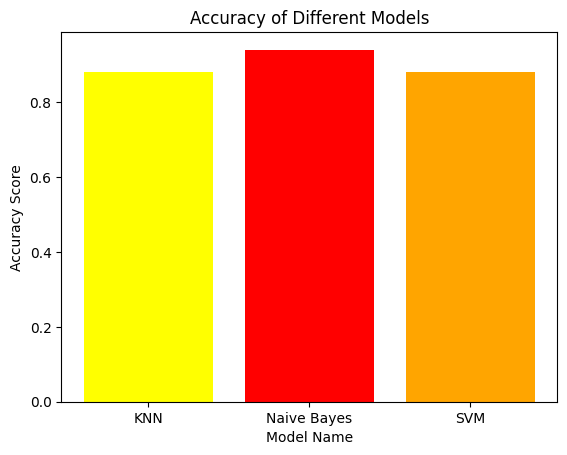

In [ ]:
models = ['KNN','Naive Bayes','SVM']
result = accu
plt.bar(models,result,color = ['yellow','red','orange'])
plt.xlabel('Model Name')
plt.ylabel('Accuracy Score')
plt.title('Accuracy of Different Models')
plt.show()